Immigration to Canada from Eastern Europe during 1980 - 2013

In [133]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
#also needed: openpyxl (install by pip)

Load the dataset and check it

In [134]:
dataset = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)

In [135]:
dataset.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

Modify the dataset

In [137]:
dataset.drop(['Type','Coverage','AREA','REG','DEV','DevName'], axis=1, inplace=True)
dataset.rename(columns={'OdName':'Country','AreaName':'Continent', 'RegName':'Region'}, inplace=True)

dataset.set_index('Country', inplace=True)
dataset.index.name = None

dataset['Total'] = dataset.sum(axis=1)
dataset.sort_values(by='Total', ascending=False, axis=0, inplace=True)  #sort by Total

dataset.columns = list(map(str, dataset.columns))

C:\Users\krzys\AppData\Local\Temp\ipykernel_5900\2261679357.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['Total'] = dataset.sum(axis=1)


Analysis

In [154]:
years = list(map(str, range(1980, 2014)))

condition = (dataset['Continent'] == 'Europe') & (dataset['Region'] == 'Eastern Europe')

datasetEE = dataset[condition]  #Eastern Europe only

(1) Top 5

Text(0.5, 0, 'Years')

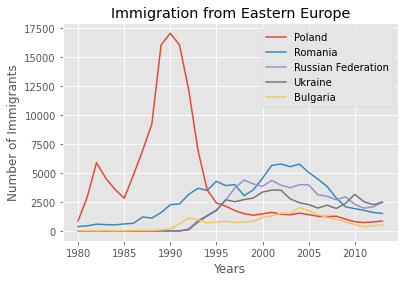

In [169]:
top5 = datasetEE[years].head()  #5 is a default value for head()
top5 = top5.transpose()

top5.plot(kind='line')

plt.title('Immigration from Eastern Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

(2) Poland

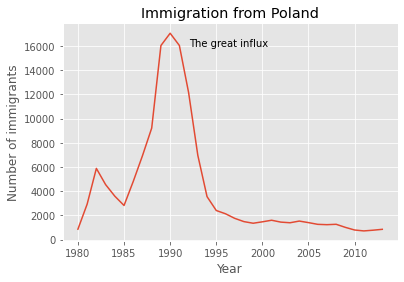

In [182]:
poland = datasetEE.loc['Poland', years]
poland.plot(kind='line')

plt.title('Immigration from Poland')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

plt.text(12, 16000, 'The great influx') 
plt.show()

'In the 1980s and 1990s, Canada accepted more than 115,000 Polish immigrants. Some of them went through refugee camps in Western Europe, some arrived in Canada from the U.S., and there were also those who came directly from Poland. This great influx of Poles to Canada was caused by a confluence of factors. The most vital was obviously the economic and political situation in Poland, but Canada’s immigration policy also played a significant role, particularly the new regulations enacted in 1978. They gave temporary preferences for East-European Self-Exiled Persons – those who left the Communist bloc and could not or did not want to return to their home countries. It is worth emphasizing that the Self-Exiled class formally existed in Canada until as late as 1990. Moreover, the new Canadian regulations enabled admitting immigrants who were sponsored by Canadian residents. This allowed the Canadian Polish Congress (CPC), following the 1981 agreement with the Minister of Employment and Immigration, to act as a guarantor to persons and institutions bringing in immigrants. With the cooperation of the CPC, ethnic organizations, and Roman Catholic Church institutions, a network of Polish information and aid centers was established in Canada. They were actively supporting the Canadian system of assistance for new immigrants, helping the newly arrived to adapt to life in a new country.'

Source: https://www.ejournals.eu/Studia-Migracyjne/2018/170(4)/art/13406/ as at 20/07/2022